In [65]:
import pandas as pd
df = pd.read_csv("mutant_moneyball.csv") # loading the dataset
df

,Member,TotalValue60s_heritage,TotalValue70s_heritage,TotalValue80s_heritage,TotalValue90s_heritage,TotalValue60s_ebay,TotalValue70s_ebay,TotalValue80s_ebay,TotalValue90s_ebay,TotalValue60s_wiz,TotalValue70s_wiz,TotalValue80s_wiz,TotalValue90s_wiz,TotalValue60s_oStreet,TotalValue70s_oStreet,TotalValue80s_oStreet,TotalValue90s_oStreet
0,warrenWorthington,929056.0,154585.0,23957.0,960.0,23335.0,3362.0,583.0,97.0,"$7,913.00","$1,105.00",$226.00,$65.75,"$68,160.00","$7,360.00",$975.00,$123.00
1,hankMcCoy,929776.0,20705.0,6631.0,881.0,23377.0,1224.0,289.0,82.0,"$7,953.00",$851.00,$89.00,$38.50,"$68,390.00","$5,260.00",$431.00,$81.00
2,scottSummers,933616.0,188635.0,29240.0,739.0,23420.0,5431.0,1031.0,82.0,"$7,993.00","$1,979.00",$438.00,$39.25,"$68,590.00","$11,675.00","$1,427.00",$74.00
3,bobbyDrake,929776.0,154585.0,1514.0,874.0,23377.0,3362.0,70.0,93.0,"$7,953.00","$1,105.00",$48.00,$62.00,"$68,390.00","$7,360.00",$137.00,$108.00
4,jeanGrey,933616.0,179899.0,16868.0,1708.0,23420.0,4903.0,665.0,170.0,"$7,993.00","$1,679.00",$165.00,$108.00,"$68,590.00","$10,265.00",$822.00,$189.00
5,alexSummers,34519.0,144946.0,9352.0,197.0,745.0,2703.0,581.0,21.0,$342.00,$597.00,$253.00,$19.00,"$1,850.00","$3,865.00",$502.00,$24.00
6,lornaDane,76279.0,144946.0,6602.0,731.0,1212.0,2703.0,405.0,41.0,$374.00,$597.00,$116.00,$43.00,"$2,000.00","$3,865.00",$293.00,$44.00
7,ororoMunroe,NaN,171050.0,54205.0,2183.0,NaN,4349.0,1730.0,334.0,NaN,"$1,224.00",$931.00,$158.00,NaN,"$6,890.00","$2,391.00",$273.00
8,kurtWagner,NaN,171050.0,50666.0,NaN,NaN,4349.0,1345.0,NaN,NaN,"$1,224.00",$736.00,NaN,NaN,"$6,890.00","$2,044.00",NaN
9,loganHowlett,NaN,171050.0,52524.0,1079.0,NaN,4349.0,1669.0,100.0,NaN,"$1,224.00",$908.00,$111.00,NaN,"$6,890.00","$2,310.00",$119.00


Converting from wide to long format is an important first step because converting to a "long" format makes the data much more easy to analyze. This is through combining several metrics into a single column, which makes calculations and filtering easier as well. We do this through using melt().

In [66]:
# Converting from wide to long format
df_melted = pd.melt(df,
                    id_vars = ["Member"], # this is what we want to keep intact
                    value_vars = ["TotalValue60s_heritage", "TotalValue70s_heritage", "TotalValue80s_heritage", "TotalValue90s_heritage", # these are the columns that we want to turn into rows
                                "TotalValue60s_ebay", "TotalValue70s_ebay", "TotalValue80s_ebay", "TotalValue90s_ebay",
                                "TotalValue60s_wiz", "TotalValue70s_ebay", "TotalValue80s_ebay", "TotalValue90s_ebay",
                                "TotalValue60s_oStreet", "TotalValue70s_oStreet", "TotalValue80s_oStreet", "TotalValue90s_oStreet"],
                    var_name = "Decade_Source", # we are combining this in to one column - named Decade_Source
                    value_name = "Value") # new column named value
df_melted

,Member,Decade_Source,Value
0,warrenWorthington,TotalValue60s_heritage,929056.0
1,hankMcCoy,TotalValue60s_heritage,929776.0
2,scottSummers,TotalValue60s_heritage,933616.0
3,bobbyDrake,TotalValue60s_heritage,929776.0
4,jeanGrey,TotalValue60s_heritage,933616.0
...,...,...,...
333,remyLeBeau,TotalValue90s_oStreet,$188.00
334,jubilationLee,TotalValue90s_oStreet,$126.00
335,lucasBishop,TotalValue90s_oStreet,$80.00
336,betsyBraddock,TotalValue90s_oStreet,$109.00


This next step of the tidy data process is important because it is breaking down the "Decade_Source" compound column I had made in the step before into separate "Decade" and "Source" variables. This makes reading the data much clearer and allows for making important distinctions between the variables in each column.   

In [67]:
# Even with the melt from above, the decade that the members were from is still connected to the source the valuation is coming from 
df_melted[["Decade", "Source"]] = df_melted["Decade_Source"].str.split("_", expand = True) # splits "TotalValue60s_heritage" at "_" into two parts
# splits into "TotalValue(decade)" and "source"
# expand = false because the "source" that comes after is a string
df_melted["Decade"] = df_melted["Decade"].str.replace("TotalValue", "") # This removed "TotalValue" from showing up in the "decade" column
# regex = false because it is a string we are getting rid of, but this is default so we don't have to include
df_melted = df_melted.drop(columns = ["Decade_Source"]) # we can drop the old column
df_melted

,Member,Value,Decade,Source
0,warrenWorthington,929056.0,60s,heritage
1,hankMcCoy,929776.0,60s,heritage
2,scottSummers,933616.0,60s,heritage
3,bobbyDrake,929776.0,60s,heritage
4,jeanGrey,933616.0,60s,heritage
...,...,...,...,...
333,remyLeBeau,$188.00,90s,oStreet
334,jubilationLee,$126.00,90s,oStreet
335,lucasBishop,$80.00,90s,oStreet
336,betsyBraddock,$109.00,90s,oStreet


The following step consists of cleaning individual columns, such as the "Value" column. The issue we see here is that the column currently has a mix of some values having dollar signs and commas and some not. In order to fix the data, we need to put all of the values in a numeric form so that we can correctly analyze and perform calculations.

In [68]:
# Fixing the "Value" column since it has entries with dollar signs and commas
df_melted["Value"] = df_melted["Value"].astype(str) # this makes sure that ALL values are converted to strings so taht the following changes can be applied to everything
# if we don't add the above, the "fixes" will cause only the values with "$" to be fixed and the rest will turn into "NaN" 
df_melted["Value"] = df_melted["Value"].str.replace("$", "") # this erases all of the dollar signs
df_melted["Value"] = df_melted["Value"].str.replace(",", "") # this erases all of the commas
df_melted["Value"] = pd.to_numeric(df_melted["Value"], errors="coerce") # this is extra - what this does is makes the decimal formatting of all the values the same
# if we don't add the above step, some values will have two decimal places and some will have one
df_melted

,Member,Value,Decade,Source
0,warrenWorthington,929056.0,60s,heritage
1,hankMcCoy,929776.0,60s,heritage
2,scottSummers,933616.0,60s,heritage
3,bobbyDrake,929776.0,60s,heritage
4,jeanGrey,933616.0,60s,heritage
...,...,...,...,...
333,remyLeBeau,188.0,90s,oStreet
334,jubilationLee,126.0,90s,oStreet
335,lucasBishop,80.0,90s,oStreet
336,betsyBraddock,109.0,90s,oStreet


Additionally, another fix I needed to address was the fact that the "Member" names were in the wrong format. The specific issues were that the first and last names weren't separated by a space and the first names of the members weren't capitalized. Fixing this ensures a consistent and readable format in which to explore and understand the data.

In [69]:
# Fixing the names of the "Members" since the first names are lowercase and the last names aren't separated
df_melted["Member"] = df_melted["Member"].str.replace(r'([a-z])([A-Z])', r'\1 \2', regex = True) 
# r'([a-z])([A-Z]) --> this finds and recognizes when a lowercase letter is immediately followed by an uppercase letter
# r'\1 \2 --> this puts a space between the last lowercase letter and the first uppercase letter
df_melted["Member"] = df_melted["Member"].str.title() # the str.title() capitalizes the first letter of each word
df_melted

,Member,Value,Decade,Source
0,Warren Worthington,929056.0,60s,heritage
1,Hank Mc Coy,929776.0,60s,heritage
2,Scott Summers,933616.0,60s,heritage
3,Bobby Drake,929776.0,60s,heritage
4,Jean Grey,933616.0,60s,heritage
...,...,...,...,...
333,Remy Le Beau,188.0,90s,oStreet
334,Jubilation Lee,126.0,90s,oStreet
335,Lucas Bishop,80.0,90s,oStreet
336,Betsy Braddock,109.0,90s,oStreet


Now, we are importing the necessary libraries so that we can create visualizations that reflect the newly cleaned data well. 

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

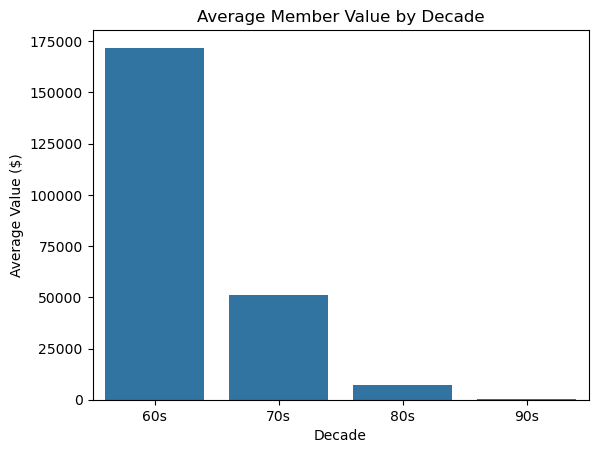

In [ ]:
# Visualization 1 - Average Value of Memebers by their Decade
average_decade_value = df_melted.groupby("Decade")["Value"].mean().reset_index() # this is grouping the decade and values so that we can calculate the means

sns.barplot(x = "Decade", # denotes the x-axis 
            y = "Value", # denotes the y-axis 
            data = average_decade_value) # allows the boxplot to use the means we had found from the .groupby above
plt.xlabel("Decade") # labesls the x-axis
plt.ylabel("Average Value ($)") # labesls the y-axis
plt.title("Average Member Value by Decade") 
plt.show()

In [ ]:
# Making a pivot table
pivot_table = pd.pivot_table(df_melted, # # routes it back to the dataframe so you dont have to call it for everything
                             index = "Source", # makes the soures the rows of the table
                             columns = "Decade", # makes the decades the columns
                             values = "Value", # the valuations are what are displyed
                             aggfunc = "mean") # the function we want is the mean of each source by decade

pivot_table # this pivot table shows the mean value of the different sources depending on the decade
# the source Wiz does not have any values for decades besides the 60s


Decade,60s,70s,80s,90s
Source,,,,
ebay,15697.7,3445.7500,650.869565,98.045455
heritage,620830.9,143405.6875,19819.521739,943.727273
oStreet,45678.5,6291.5625,873.434783,103.818182
wiz,5204.8,NaN,NaN,NaN


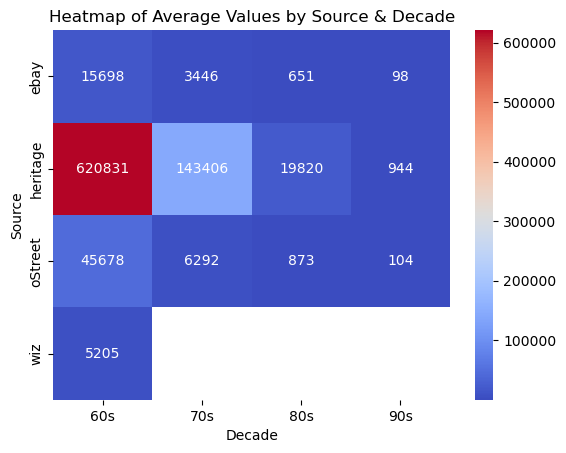

In [45]:
# Visualization 2 - Heatmap of the average value of each source depending on the decade
sns.heatmap(pivot_table, 
            cmap = "coolwarm", 
            annot = True, # putting True on this puts the value within the heatmap boxes
            fmt = ".0f", # adding this means that the numbers in the boxes will be rounded to the nearest whole number (for clarity)
            )
plt.xlabel("Decade")
plt.ylabel("Source")
plt.title("Heatmap of Average Values by Source & Decade")
plt.show()